# Data Visualisation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Datasets/final_tennis_dataset.csv')

## ELO

<Axes: xlabel='WINNER_ELO_BEFORE', ylabel='Count'>

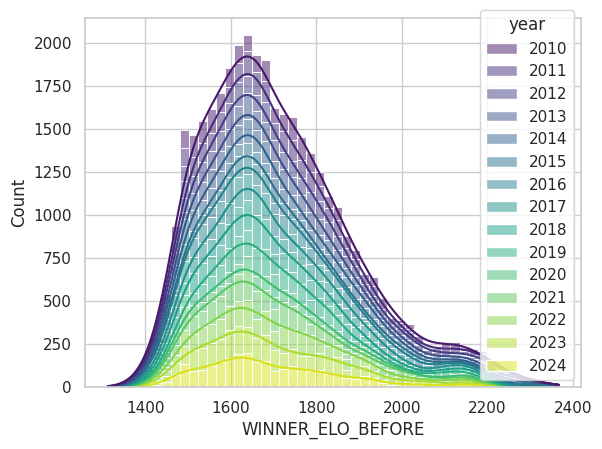

In [28]:
sns.histplot(
    data=df_elo,
    x='WINNER_ELO_BEFORE',
    hue=df_elo['year'].astype(str),  # Convertir en string pour que seaborn gère mieux
    bins=50,
    kde=True,
    multiple='stack',
    palette='viridis'
)

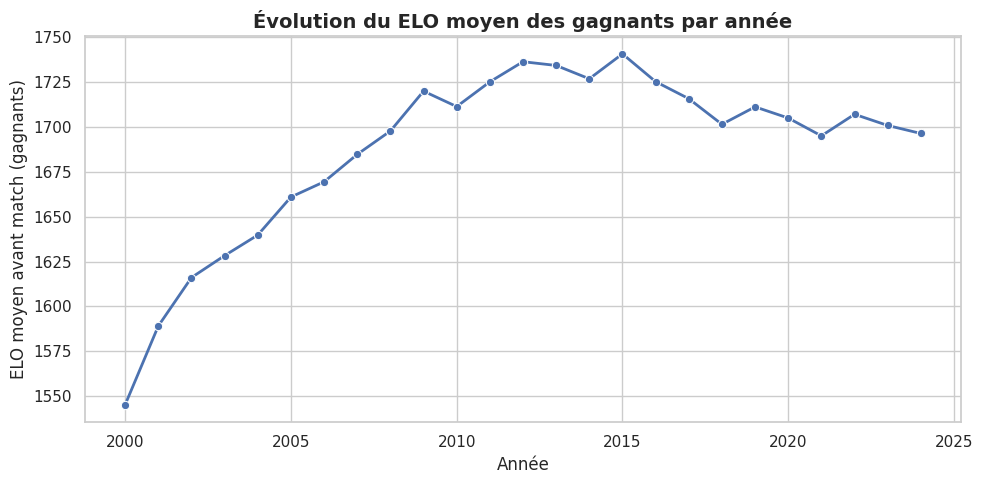

In [29]:
# Calcul de l’ELO moyen des gagnants par année
elo_mean_by_year = df.groupby('year')['WINNER_ELO_BEFORE'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=elo_mean_by_year, x='year', y='WINNER_ELO_BEFORE', marker='o', linewidth=2)
plt.title("Évolution du ELO moyen des gagnants par année", fontsize=14, fontweight='bold')
plt.xlabel("Année", fontsize=12)
plt.ylabel("ELO moyen avant match (gagnants)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

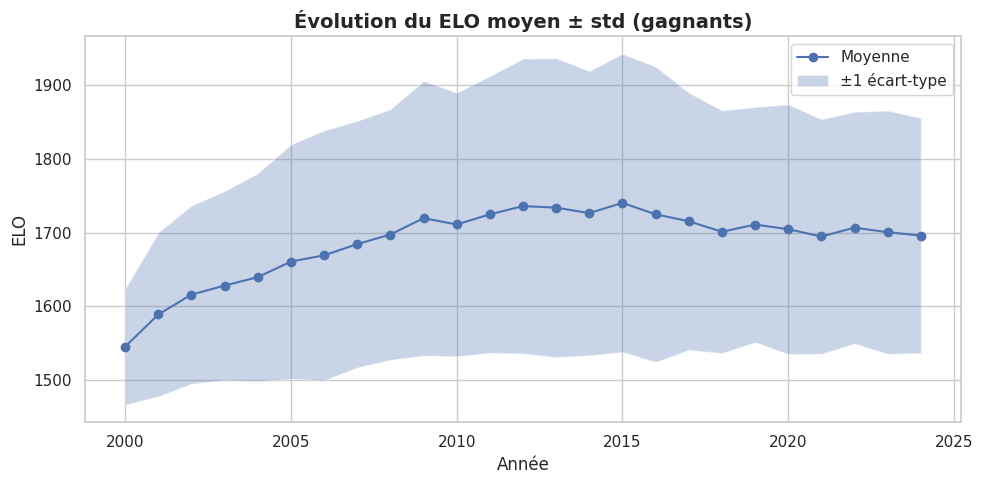

In [27]:
elo_stats = df.groupby('year')['WINNER_ELO_BEFORE'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(elo_stats['year'], elo_stats['mean'], label='Moyenne', marker='o')
plt.fill_between(elo_stats['year'], elo_stats['mean'] - elo_stats['std'], elo_stats['mean'] + elo_stats['std'],
                 alpha=0.3, label='±1 écart-type')
plt.title("Évolution du ELO moyen ± std (gagnants)", fontsize=14, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("ELO")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


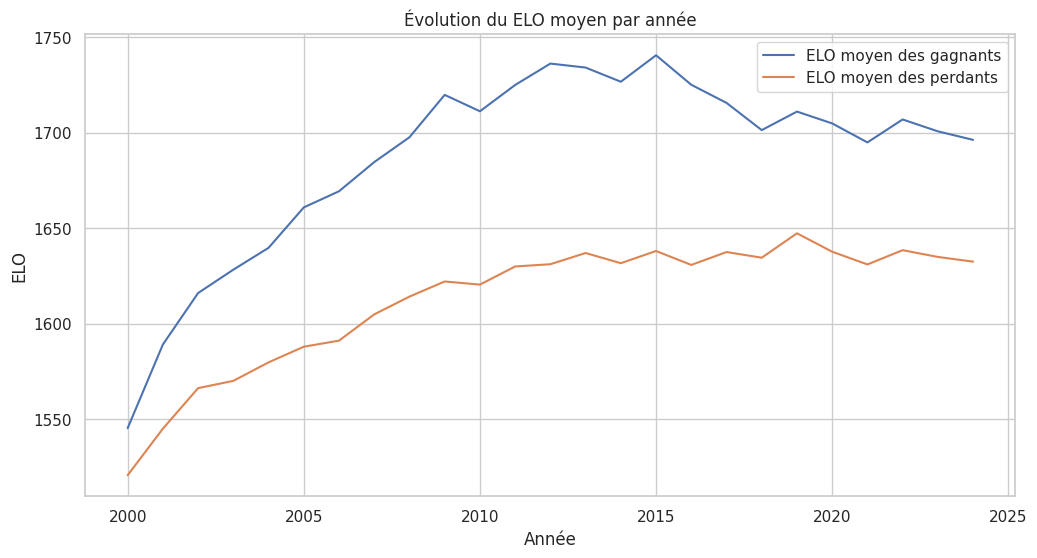

In [24]:
# 2. Évolution du ELO moyen par année
elo_yearly = df.groupby('year')[['WINNER_ELO_BEFORE', 'LOSER_ELO_BEFORE']].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(elo_yearly['year'], elo_yearly['WINNER_ELO_BEFORE'], label='ELO moyen des gagnants')
plt.plot(elo_yearly['year'], elo_yearly['LOSER_ELO_BEFORE'], label='ELO moyen des perdants')
plt.title("Évolution du ELO moyen par année")
plt.xlabel("Année")
plt.ylabel("ELO")
plt.legend()
plt.grid(True)
plt.show()

## CORRELATION

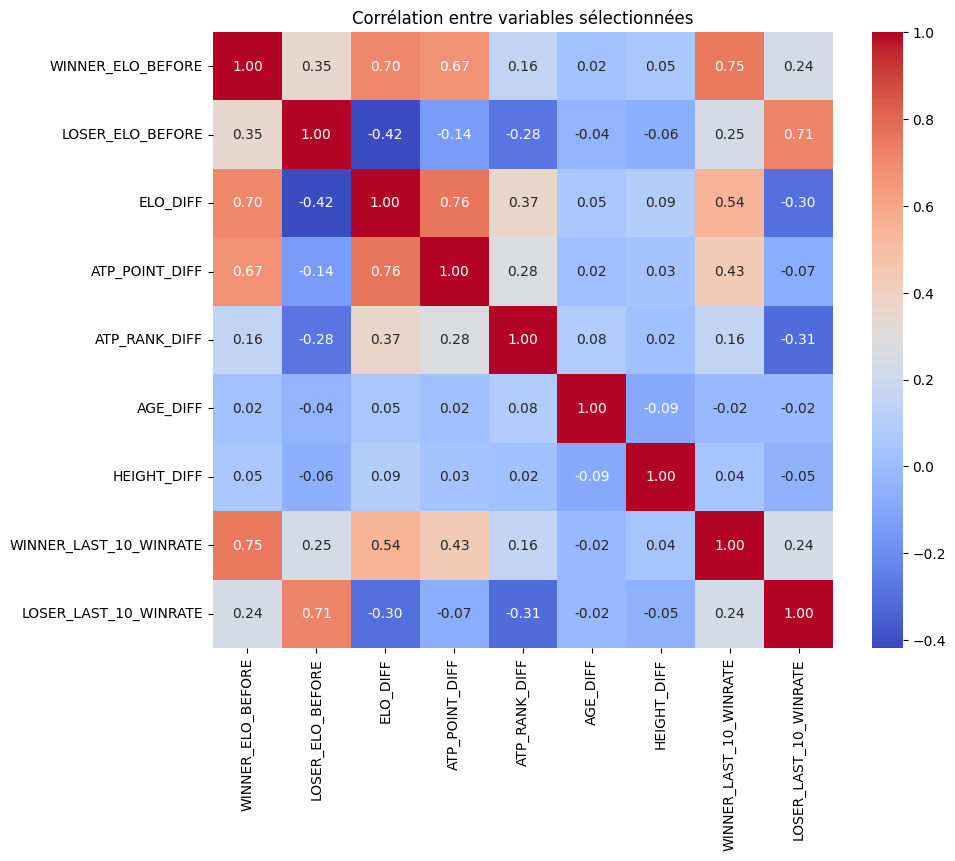

In [ ]:
features_subset = [
    'WINNER_ELO_BEFORE', 'LOSER_ELO_BEFORE', 'ELO_DIFF',
    'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF', 'HEIGHT_DIFF',
    'WINNER_LAST_10_WINRATE', 'LOSER_LAST_10_WINRATE'
]
plt.figure(figsize=(10, 8))
sns.heatmap(df[features_subset].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation entre variables sélectionnées")
plt.show()

## MATCHES

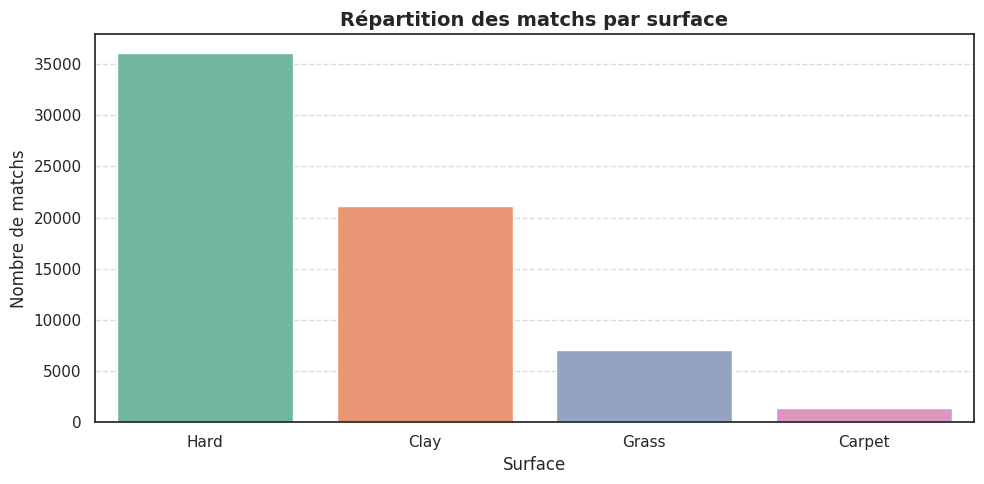

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style="white")
palette = sns.color_palette("Set2", n_colors=df['surface_raw'].nunique())

sns.countplot(
    data=df,
    x='surface_raw',
    hue='surface_raw',
    order=df['surface_raw'].value_counts().index,
    palette=palette,
    legend=False
)

plt.title("Répartition des matchs par surface", fontsize=14, fontweight='bold')
plt.xlabel("Surface", fontsize=12)
plt.ylabel("Nombre de matchs", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## ADVANCED STATS

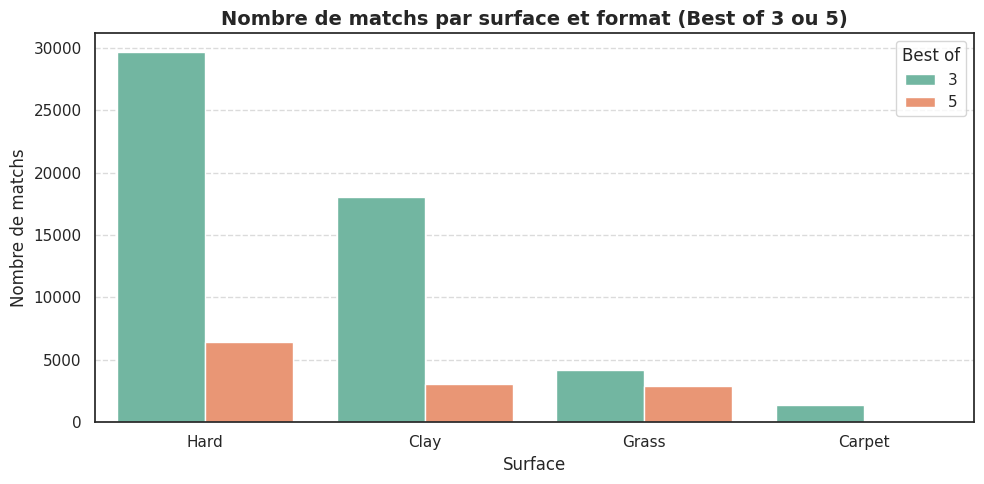

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='surface_raw',
    hue='best_of',
    palette='Set2'
)
plt.title("Nombre de matchs par surface et format (Best of 3 ou 5)", fontsize=14, fontweight='bold')
plt.xlabel("Surface")
plt.ylabel("Nombre de matchs")
plt.legend(title="Best of")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
df.head()

,tourney_id,tourney_name,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,...,P_2NDWON_WINNER_LAST_2000,P_2NDWON_LOSER_LAST_2000,P_BPSAVED_WINNER_LAST_2000,P_BPSAVED_LOSER_LAST_2000,WINNER_ELO_BEFORE,LOSER_ELO_BEFORE,ELO_DIFF,WINNER_ELO_SURFACE_BEFORE,LOSER_ELO_SURFACE_BEFORE,ELO_SURFACE_DIFF
0,2000-339,Adelaide,32.0,A,20000103,4,103206,7.0,NaN,Sebastien Grosjean,...,0.5,0.5,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
1,2000-339,Adelaide,32.0,A,20000103,3,102998,NaN,NaN,Jan Michael Gambill,...,0.5,0.5,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
2,2000-891,Chennai,32.0,A,20000103,15,102233,NaN,WC,Leander Paes,...,0.5,0.5,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
3,2000-891,Chennai,32.0,A,20000103,14,102106,NaN,NaN,Davide Sanguinetti,...,0.5,0.5,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
4,2000-891,Chennai,32.0,A,20000103,13,103714,8.0,NaN,Andreas Vinciguerra,...,0.5,0.5,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
